# t-test

In [1]:
## Import the packages
import numpy as np
from scipy import stats

In [2]:
## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

In [3]:
print(a)
print(b)
print(var_a)
print(var_b)

[2.2945348  1.36209941 2.77647457 1.78791817 3.27052126 0.99547763
 1.65985391 2.95152437 4.34983498 3.53963163]
[ 1.02071343 -0.40449497  1.65165102 -1.38074113  0.22294745  1.91631314
 -0.03660232 -0.01302222  2.10117622  0.52446992]
1.1322501537307765
1.234961110034052


In [4]:
#std deviation
s = np.sqrt((var_a + var_b)/2)
s

1.0879364098523472

In [5]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value 
### (computed internally) we get a good p value of 0.0005 and thus 
### we reject the null hypothesis and thus it proves that the mean of the two 
### distributions are different and statistically significant.

t = 3.9843511409330126
p = 0.0008696179358644862


In [6]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.9843511409330126
p = 0.0008696179358644912


# z-test

In [6]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats import weightstats as stests

In [7]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

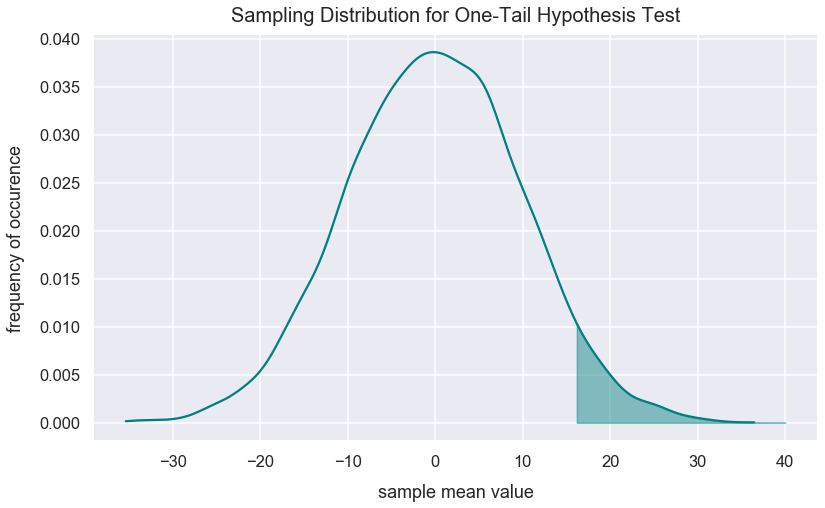

In [8]:
values = np.random.normal(loc=0, scale=10, size=6000)
two_std_from_mean = np.mean(values) + np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [9]:
data=np.random.normal(loc=3.4,scale=0.1,size=100)
singleValue=3.3
values

array([-12.98667339,   2.63010539,   2.99607339, ...,  -9.62720824,
        -8.39133075,   2.020974  ])

In [10]:
# Assuming data are normally distributed, we can do z-test
testResult=stests.ztest(values,value=singleValue)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

# For me, it is more convincing NOT to assume normal distribution
# Can make a statement like this:

N=len(data)
ave=np.mean(data)
if(singleValue<ave):
    print("Value is less than mean of data and "+str(len(data[data<singleValue]))+" out of "+str(N)+" individual observations are less than value.")
else:
    print("Value is greater than mean of data and "+str(len(data[data>singleValue]))+" out of "+str(N)+" individual observations are greater than value.")

p-value is: 1.687956664706027e-159

Value is less than mean of data and 16 out of 100 individual observations are less than value.


# ANOVA

## One-way ANOVA

Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable and termed as factor. As there are four types of treatments, treatment factor has four levels.

For this experimental design, there is only factor (treatments) or independent variable to evaluate, and therefore, one-way ANOVA is suitable for analysis.

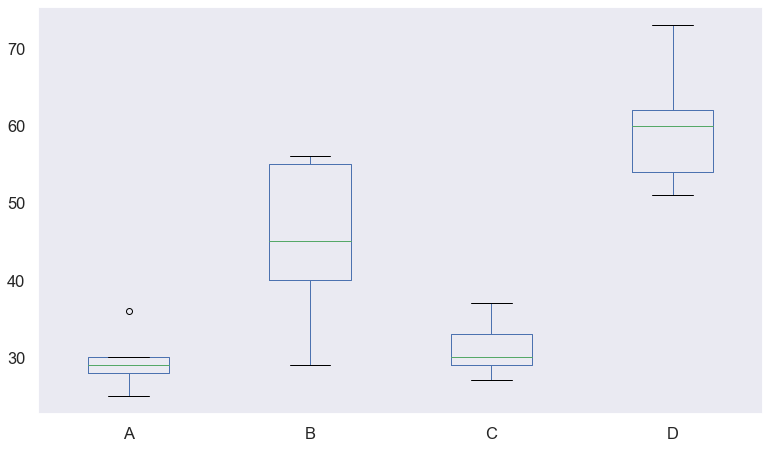

In [11]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)
plt.show()

# Dataset is small, hence it is pasted below for reference
#A	B	C	D
#25	45	30	54
#30	55	29	60
#28	29	33	51
#36	56	37	62
#29	40	27	73

In [12]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)


17.492810457516338 2.639241146210922e-05


In [13]:
# get ANOVA table as R like output
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


Interpretation: The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.



## Two-way ANOVA

One of the standard learning data sets is the “ToothGrowth” data set. The tooth growth data set is the length of the odontoblasts (teeth) in each of 10 guinea pigs at three Vitamin C dosage levels (0.5, 1, and 2 mg) with two delivery methods (orange juice or ascorbic acid).

The file contains 60 observations of 3 variables

- len : Tooth length
- supp : Supplement type (VC or OJ)
- dose : Dose in milligrams


Data has been taken from <a href="http://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv">here</a>

In [15]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
datafile="ToothGrowth.csv"
data = pd.read_csv(datafile)

In [ ]:
# Exploring data
fig = interaction_plot(data.dose, data.supp, data.len, colors=['red','blue'], markers=['D','^'], ms=10) 

In [ ]:
# Degrees of freedom
N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))

In [ ]:
grand_mean = data['len'].mean()

In [ ]:
# Sum of Squares A – supp
ssq_a = sum([(data[data.supp ==l].len.mean()-grand_mean)**2 for l in data.supp])
# Sum of Squares B – dose
ssq_b = sum([(data[data.dose ==l].len.mean()-grand_mean)**2 for l in data.dose])
# Sum of Squares Total
ssq_t = sum((data.len - grand_mean)**2)
# Sum of Squares Within (error/residual)
vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)
# Sum of Squares interaction
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w

# Mean Square A
ms_a = ssq_a/df_a

# Mean Square B
ms_b = ssq_b/df_b

# Mean Square AxB
ms_axb = ssq_axb/df_axb

# Mean Square Within/Error/Residual
ms_w = ssq_w/df_w


In [ ]:
# F-ratio
# The F-statistic is simply the mean square for each effect and the interaction divided by the mean square for within (error/residual).
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

In [ ]:
# Obtaining p-values
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

In [ ]:
# Results
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']

aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 
                          'supp:dose', 'Residual'])

In [ ]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

In [ ]:
eta_squared(aov_table1)
omega_squared(aov_table1)
print(aov_table1)

In [ ]:
# Method 2- Two-way ANOVA using Statsmodels
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)


In [ ]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

In [ ]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

# Chisquare

In [ ]:
import pandas as pd

Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different

In [ ]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

Let's calculate the chi-squared statistic for our data to illustrate:

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)


In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)


In [ ]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

The test results agree with the values we calculated above.

## References

- https://github.com/aerinkim/MRC_utils/blob/master/t_test_python.py
- https://gist.github.com/CnrLwlss/904a14ebed788073543d
- https://reneshbedre.github.io
- http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html